# Sutton 1981

In [1]:
from sutton1981 import Agent, SimulatedEnvironment
import numpy as np

np.random.seed(123)

## One layer gain depth

In [2]:
gain_list = []

# for environment
variance_environment = 1.0
variance_noise = 0.3
max_steps = 4000

# for agent
learning_rate_control_param = 0.001  # caption figure C.2b
initial_gain = 0.0

In [3]:
env = SimulatedEnvironment(sa=variance_environment, sb=variance_noise, max_steps=max_steps)

# gain_depth 0: constant learning rate, 1: dynamic learning rate with 1 level of extra control
agent = Agent(initial_gain=initial_gain, b=learning_rate_control_param, gain_depth=1)

In [4]:
for step in range(max_steps):
    if step == 1000:
        env.change_variance(sb=2.0)
    elif step == 2000:
        env.change_variance(sb=0.3)

    true_y_t = env.step()
    _ = agent.action(true_y_t=true_y_t)

    gain_list.append(agent.gain)

In [5]:
import matplotlib.pyplot as plt

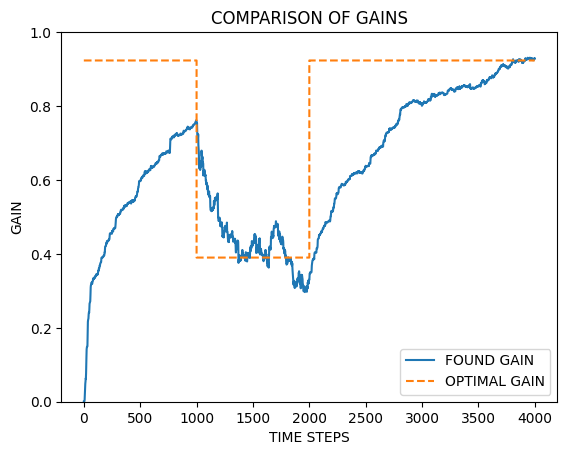

In [6]:
# Figure C.2a
plt.plot(gain_list, linestyle="-", label='FOUND GAIN')
plt.ylim([0, 1])

step_y = [0.92328] * 1000  # equation C.7, plug in sa and sb params
step_y += [0.39] * 1000
step_y += [0.92328] * 2000
plt.step(np.arange(max_steps), step_y, where='post', linestyle="--", label='OPTIMAL GAIN')

plt.xlabel("TIME STEPS")
plt.ylabel("GAIN")
plt.title("COMPARISON OF GAINS")
plt.legend()
plt.show()

## Two layer gain examples

In [7]:
gain_list = []
max_steps = 3000

env = SimulatedEnvironment(sa=1.0, sb=3.0, max_steps=max_steps)

agent = Agent(initial_gain=initial_gain, b=0.001, gain_depth=1)

In [8]:
for step in range(max_steps):
    true_y_t = env.step()
    _ = agent.action(true_y_t=true_y_t)
    gain_list.append(agent.gain)

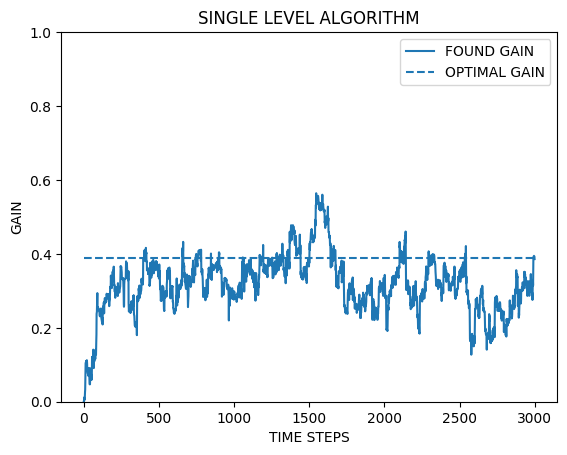

In [9]:
# Figure C.3a
plt.plot(gain_list, linestyle="-", label='FOUND GAIN')
plt.ylim([0, 1])

plt.hlines(0.39, xmin=0, xmax=max_steps, linestyle="--", label="OPTIMAL GAIN")

plt.xlabel("TIME STEPS")
plt.ylabel("GAIN")
plt.title("SINGLE LEVEL ALGORITHM")
plt.legend()
plt.show()

In [10]:
gain_list = []
max_steps = 3000

env = SimulatedEnvironment(sa=1.0, sb=3.0, max_steps=max_steps)

agent = Agent(initial_gain=initial_gain, b=5e-8, gain_depth=2)

In [11]:
for step in range(max_steps):
    true_y_t = env.step()
    _ = agent.action(true_y_t=true_y_t)
    gain_list.append(agent.gain)

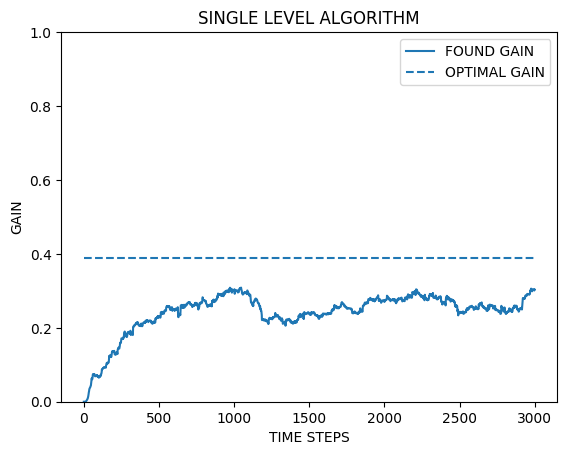

In [12]:
# Figure C.3b
plt.plot(gain_list, linestyle="-", label='FOUND GAIN')
plt.ylim([0, 1])

plt.hlines(0.39, xmin=0, xmax=max_steps, linestyle="--", label="OPTIMAL GAIN")

plt.xlabel("TIME STEPS")
plt.ylabel("GAIN")
plt.title("TWO LEVEL ALGORITHM")
plt.legend()
plt.show()